#Bank Marketing Data- Solution by Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving bank.csv to bank.csv


In [ ]:

bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
bank['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
bank.groupby('job').size()

job
admin.           1334
blue-collar      1944
entrepreneur      328
housemaid         274
management       2566
retired           778
self-employed     405
services          923
student           360
technician       1823
unemployed        357
unknown            70
dtype: int64

In [ ]:
bank.shape

(11162, 17)

In [ ]:
bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


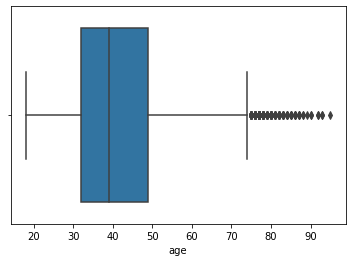

In [ ]:
sns.boxplot(x=bank["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


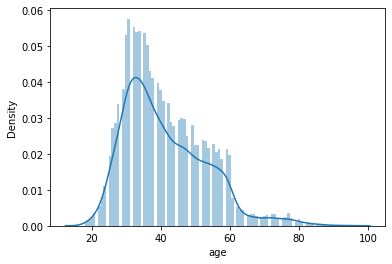

In [ ]:

# Distribution of Age
sns.distplot(bank.age, bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


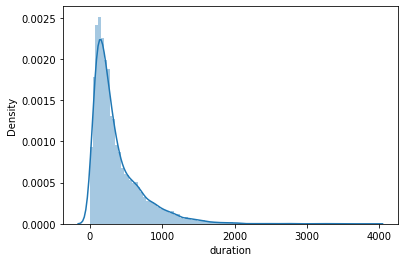

In [ ]:

sns.distplot(bank.duration, bins=100)

In [ ]:

bank_data=bank.copy()

In [ ]:
jobs=['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student']
for j in jobs:
    print("{:15}  :  {:5}".format(j,len(bank_data[(bank_data.deposit=="yes")&(bank_data.job==j)])))

admin.           :    631
technician       :    840
services         :    369
management       :   1301
retired          :    516
blue-collar      :    708
unemployed       :    202
entrepreneur     :    123
housemaid        :    109
unknown          :     34
self-employed    :    187
student          :    269


In [ ]:
bank_data[bank_data['deposit']=="yes"].groupby('job').size()

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
dtype: int64

In [ ]:
for j in jobs:
    print(len(bank_data[(bank_data.deposit=="yes")&(bank_data.job==j)]))

631
840
369
1301
516
708
202
123
109
34
187
269


In [ ]:

len(bank_data[(bank_data.deposit=="yes")&(bank_data.job=="technician")])

840

In [ ]:
len(bank_data)

11162

In [ ]:

bank.shape

(11162, 17)

In [ ]:
#Different types od job categories and their counts
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [ ]:
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [ ]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [ ]:

# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [ ]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,pink-collar,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
#values for default : yes/no
bank_data['default_cat']=bank_data['default'].map({'yes':1,'no':0})
bank_data.drop('default', axis=1,inplace=True)

In [ ]:
bank_data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,white-collar,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,0
3,55,pink-collar,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0
4,54,white-collar,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0


In [ ]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

In [ ]:
bank_data.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [ ]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [ ]:

# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [ ]:

bank_data.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

In [ ]:
bank_data.pdays.max()

854

In [ ]:
print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [ ]:

# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [ ]:
bank_data.pdays.head()

0    10000
1    10000
2    10000
3    10000
4    10000
Name: pdays, dtype: int64

In [ ]:
tempdata= {'c1':[1,2,3,1,1,1,1,1],'c2':[23,23,23,23,23,23,23,9] }
df=pd.DataFrame(data=tempdata)
df

,c1,c2
0,1,23
1,2,23
2,3,23
3,1,23
4,1,23
5,1,23
6,1,23
7,1,9


In [ ]:
df[df['c1']==1]['c1']=10000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.loc[df['c1'] == 1,'c1']=1000
df.head(2)

,c1,c2
0,1000,23
1,2,23


In [ ]:
bank_data.loc[1]

age                      56
job            white-collar
marital             married
education         secondary
balance                  45
housing                  no
contact             unknown
duration               1467
campaign                  1
pdays                 10000
previous                  0
poutcome            unknown
default_cat               0
loan_cat                  0
deposit_cat               1
Name: 1, dtype: object

In [ ]:
bank_data.head()

,age,job,marital,education,balance,housing,contact,duration,campaign,pdays,previous,poutcome,default_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,yes,unknown,1042,1,10000,0,unknown,0,0,1
1,56,white-collar,married,secondary,45,no,unknown,1467,1,10000,0,unknown,0,0,1
2,41,technician,married,secondary,1270,yes,unknown,1389,1,10000,0,unknown,0,0,1
3,55,pink-collar,married,secondary,2476,yes,unknown,579,1,10000,0,unknown,0,0,1
4,54,white-collar,married,tertiary,184,no,unknown,673,2,10000,0,unknown,0,0,1


In [ ]:
#create a new column: recent_pdays
bank_data['recent_days']=1/bank_data['pdays']
bank_data.drop('pdays',axis=1,inplace=True)
bank_data.tail()

,age,job,marital,education,balance,housing,contact,duration,campaign,previous,poutcome,default_cat,loan_cat,deposit_cat,recent_days
11157,33,blue-collar,single,primary,1,yes,cellular,257,1,0,unknown,0,0,0,0.000100
11158,39,pink-collar,married,secondary,733,no,unknown,83,4,0,unknown,0,0,0,0.000100
11159,32,technician,single,secondary,29,no,cellular,156,2,0,unknown,0,0,0,0.000100
11160,43,technician,married,secondary,0,no,cellular,9,2,5,failure,0,1,0,0.005814
11161,34,technician,married,secondary,0,no,cellular,628,1,0,unknown,0,0,0,0.000100


In [ ]:

# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [ ]:
bank_data.tail()

,age,job,marital,education,balance,contact,duration,campaign,previous,poutcome,default_cat,loan_cat,deposit_cat,recent_days,housing_cat
11157,33,blue-collar,single,primary,1,cellular,257,1,0,unknown,0,0,0,0.000100,1
11158,39,pink-collar,married,secondary,733,unknown,83,4,0,unknown,0,0,0,0.000100,0
11159,32,technician,single,secondary,29,cellular,156,2,0,unknown,0,0,0,0.000100,0
11160,43,technician,married,secondary,0,cellular,9,2,5,failure,0,1,0,0.005814,0
11161,34,technician,married,secondary,0,cellular,628,1,0,unknown,0,0,0,0.000100,0


In [ ]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'],
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

In [ ]:

bank_with_dummies.head()

,age,balance,contact,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,unknown,1042,1,0,0,0,1,0.0001,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,56,45,unknown,1467,1,0,0,0,1,0.0001,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,41,1270,unknown,1389,1,0,0,0,1,0.0001,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,55,2476,unknown,579,1,0,0,0,1,0.0001,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,54,184,unknown,673,2,0,0,0,1,0.0001,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [ ]:
bank_with_dummies.shape

(11162, 28)

In [ ]:
bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.130801,0.473840,0.003124,0.473123,0.174162,0.029385,0.140208,0.107239,0.036284,0.163322,0.349400,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.337198,0.499338,0.030686,0.499299,0.379266,0.168892,0.347218,0.309431,0.187004,0.369676,0.476802,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.001919,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


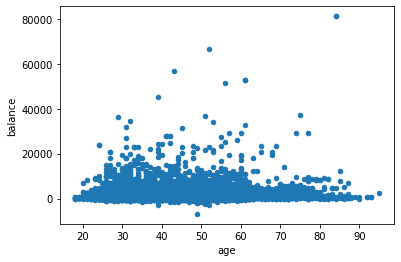

In [ ]:
#Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter',x='age',y='balance')
# Across all ages, majority of people have savings of less than 20000.

In [ ]:
bank_with_dummies.balance.value_counts()

0       774
1        39
3        35
2        34
4        29
       ... 
4641      1
2975      1
918       1
2959      1
7561      1
Name: balance, Length: 3805, dtype: int64

In [ ]:
bank_with_dummies.head(2)

,age,balance,contact,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,unknown,1042,1,0,0,0,1,0.0001,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,56,45,unknown,1467,1,0,0,0,1,0.0001,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1


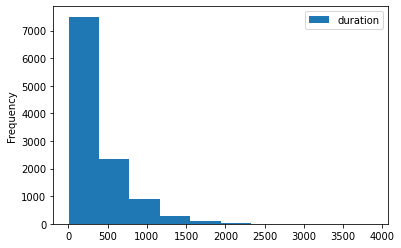

In [ ]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [ ]:
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.091511,1.0,0.004238,0.365854,0.133863,0.023256,0.193042,0.090376,0.035356,0.158820,0.365286,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.288361,0.0,0.035686,0.481714,0.340537,0.150729,0.394723,0.286747,0.184696,0.365543,0.481556,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,0.000000,1.0,0.005128,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(bank_with_dummies[(bank_with_dummies.deposit_cat==1) &
                      (bank_with_dummies.loan_cat==1) & (bank_with_dummies.housing_cat==1)])

265

In [ ]:
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

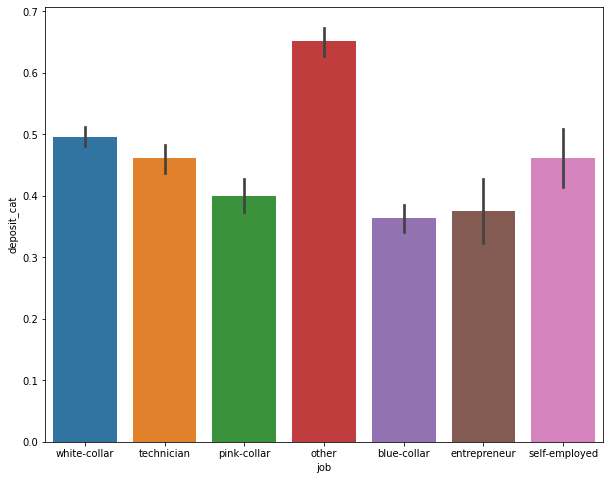

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='job',y='deposit_cat',data=bank_data)

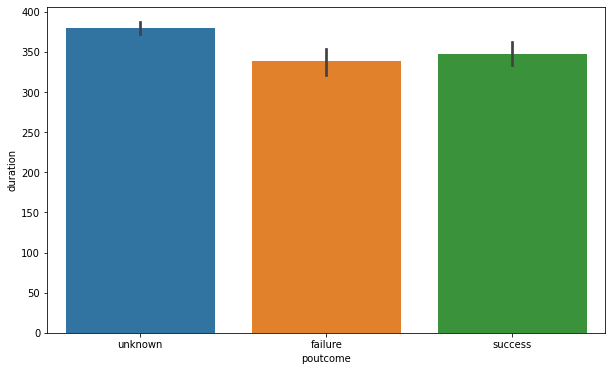

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [ ]:

# make a copy
bankcl = bank_with_dummies

In [ ]:
corr=bankcl.corr()
corr

,age,balance,duration,campaign,previous,default_cat,loan_cat,deposit_cat,recent_days,housing_cat,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.031418,0.034901,0.019102,-0.168700,-0.066567,0.024176,0.296418,-0.027942,-0.023163,-0.082716,-0.080122,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.084589,0.081129,-0.004379,-0.077092,-0.046220,0.005039,0.050744,-0.041063,0.020264,0.003802,0.013780,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,-0.001914,0.451919,-0.014868,0.035051,0.029986,-0.000908,0.010680,0.005345,0.013506,-0.010440,-0.031980,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.034722,-0.128081,-0.026296,0.006660,0.005522,0.013883,-0.050212,0.011958,0.001776,0.021738,0.001944,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.022668,0.139867,0.122076,-0.000840,-0.039939,-0.022470,0.031191,-0.028623,-0.002338,0.002035,0.034929,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.076434,-0.040680,-0.011290,0.011076,0.022779,0.022060,-0.018130,-0.007173,0.007493,0.003109,-0.013425,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,1.000000,-0.110580,-0.012697,0.076761,0.057956,0.042631,-0.096196,0.014969,0.004299,0.006864,-0.007871,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.110580,1.000000,0.034457,-0.203888,-0.100840,-0.034443,0.144408,-0.051717,-0.004707,-0.011557,0.031621,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_days,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.012697,0.034457,1.000000,-0.029350,-0.018514,0.006251,0.024356,-0.001183,-0.008226,-0.007412,0.004516,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,0.076761,-0.203888,-0.029350,1.000000,0.189848,0.011492,-0.233309,0.043884,-0.016903,0.006551,-0.012111,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

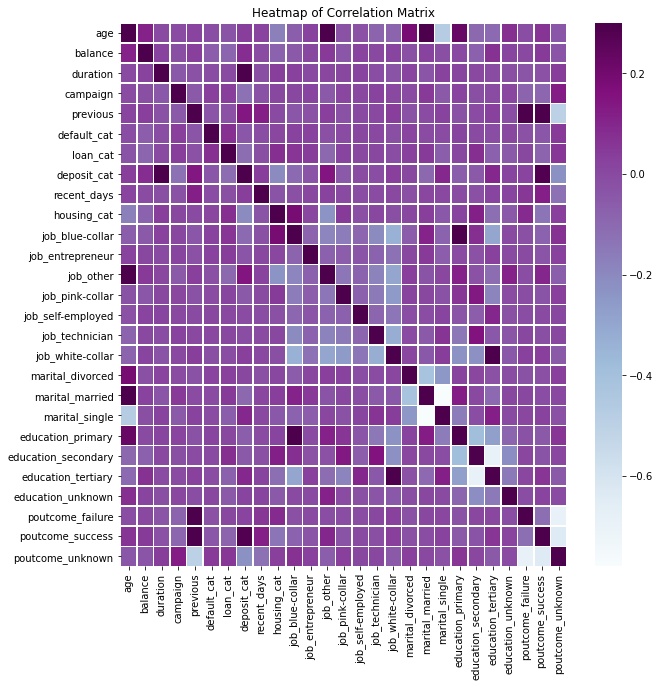

In [ ]:
#Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="BuPu",vmax=0.3, linewidths=.5,)
plt.title('Heatmap of Correlation Matrix')

In [ ]:
cor_deposit_df=corr['deposit_cat']
cor_deposit_df.head(2)

age        0.034901
balance    0.081129
Name: deposit_cat, dtype: float64

In [ ]:
data_drop_deposit=bankcl.drop('deposit_cat',axis=1)

In [ ]:
label=bankcl.deposit_cat
data_train,data_test,label_train,label_test=train_test_split(data_drop_deposit,label,test_size=0.2,random_state=50)

In [ ]:
bank = bank.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
dt2=tree.DecisionTreeClassifier(random_state=1,max_depth=2)


In [ ]:
dt2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')